# Kunskapskontroll 2 Del 1

## Teoretiska frågor 
## 1. Lotta delar upp sin data i ”Träning”, ”Validering” och ”Test”, vad används respektive del för? 
Träningsdatan används för att träna modellen. 
Valideringsdatan används för att justera hyperparametrar och för att utvärdera modellen under träning, här används K-fold cross-validation. 
Testdatan används för att utvärdera modellens prestanda efter att den har tränats och justerats. Alltså, den används för att utvärdera modellens generaliseringsförmåga på slutet.


## 2. Förklara (gärna med ett exempel): Ordinal encoding, one-hot encoding, dummy variable encoding.

**Ordinal encoding** är en metod där man använde kategoriska variabler som har en inbördes ordning och omvandla det till numeriska värden. Ett exempel för kategoriska variabler med inbördes ordning är ( låg, medel, hög) eller betygssystem (3, 4, 5 för respektiv G, VG, MVG). Fördelen är att den är enkel och effektiv. Nackdelen är att den skapa illusoriska numeriska avstånd.

låg --> 0
medel --> 1
hög --> 2



**One-hot encoding** är en metod för att omvandla kategoriska variabler till binär vektor, där varje kategori representeras som en enskild kolumn. Den används för kategori utan inbördes ordning. T.ex. anta att vi har en variabel som beskriver olika färger (röd, grön, blå). Fördelen med den är att man inte behöver göra antagande om ordning och den är bra för icke-ordnade kategorier. Nackdelen är att med den metoden behöver många kolumner med många kategorier skapas. 

Färg   
Röd [1, 0, 0]
Grön[0, 1, 0]
Blå [0, 0, 1]

**Dummy variable encoding** liknar one-hot-encoding, men med en skillnad: en av kategorierna utesluts från modellen för
att undvika att en kategori är perfekt predicerad av de andra.

Till skillnad från one-hot-encoding som skapar en binär kolumn för varje kategori, skapar dummy encoding bara binär kolumn för alla kategorier uton den referenskategorin. För dummy encoding blir alltid (K-1) dummies om k-kategorier.
Som det visas i exempel nedanför, blå utesluts och den representerar när båda de andra kolummnerna är 0. Denna metod används ofta i linjära modeller t.ex linjär regression eller logistisk regression.

Exempel:

Färg       Dummy Encoding
Röd        [1,0]
Grön       [0,1]
Blå        [0,0]


## 3. Göran påstår att datan antingen är ”ordinal” eller ”nominal”. Julia säger att detta måstetolkas. Hon ger ett exempel med att färger såsom {röd, grön, blå} generellt sett inte har någon inbördes ordning (nominal) men om du har en röd skjorta så är du vackrast på festen(ordinal) – vem har rätt?

Ordinal data har en inbördes ordning som t.ex betygssystem medan nominal data inte har någon ordning som t.ex färger. Eftersom färger är nominal data och inte har inbördes ordning, har Julia rätt. 

## 4.Vad används joblib och pickle till?
Joblib och Pickle används för att spara tränade modeller så att de kan återanvändas utan att man behöva träna om modellen. Joblib är effektivare för stora numpy-arrays och används oftast i maskininlärning.

## Del 2 Modellera MNIST datan. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import joblib
from PIL import Image
from sklearn.datasets import load_digits

In [21]:
# Ladda Mnist-data från OpenML med hjälp av sklearn.datasets.fetch_openml

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)
#print(mnist.DESCR)                  


In [9]:
# Dela upp data i features (X) och Target (y)
X = mnist["data"]
y = mnist ["target"].astype(np.uint8)

# Dela upp datan i träning, validering och test
# 60% träning(X_train, y_train)
# 20% validering (X_val, y_val)
# 20% test (X_test, y_test)

from sklearn.model_selection import train_test_split
# Första uppdelning: 60% av datan är till träningsdata, och 40% är till valideringsdatan och testdatan.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# Andra uppdelning: Dela upp den 40%-datan i 50% validering + 50% test (vilket ger 20% till validering och 20% till test)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Standardisera träning, validering och test
# Datan standardiserades med funktionen StandardScaler så att alla funktioner har samma skala.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Kontrollera storlekar på de olika uppsättningarna
print(f'X_train: {X_train_scaled.shape}, X_val: {X_val_scaled.shape}, X_test: {X_test_scaled.shape}')


X_train: (42000, 784), X_val: (14000, 784), X_test: (14000, 784)


# Träna två modeller för att jämföra deras prestanda: SVC och Random Forest

Den första modellen som ska tränas är en SVM-modell. Den ska utvärderas med hjälp av Accuracy och Confunsion Matris.

Den andra modellen är Random Forest som ska också utvärderas med hjälp av Accuracy och Confusion Matris. 


SVM Accuracy: 0.9599


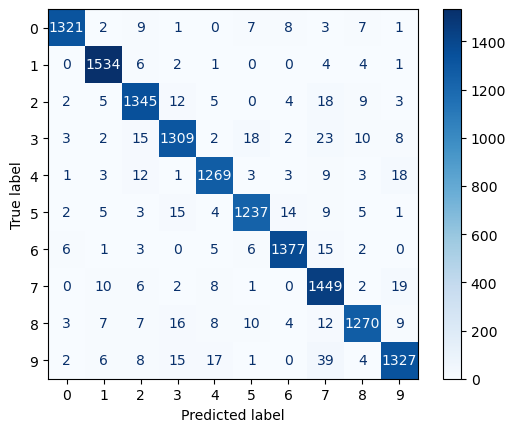

Random Forest Accuracy: 0.9659


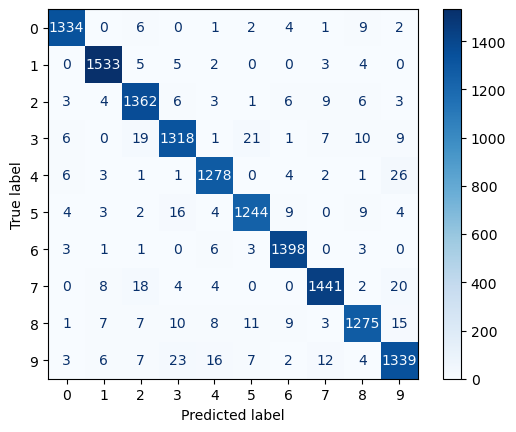

In [11]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# SVC-modell
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)
svm_y_pred = svm_clf.predict(X_val_scaled)
svm_accuracy = accuracy_score(y_val, svm_y_pred)
print(f'SVM Accuracy: {svm_accuracy:.4f}')

# Visualisera confusion matrix för SVM
cm_svm = confusion_matrix(y_val, svm_y_pred)
cmd_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.arange(10))
cmd_svm.plot(cmap=plt.cm.Blues)
plt.show()

# Random Forest-modell
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
rf_y_pred = rf_clf.predict(X_val_scaled)
rf_accuracy = accuracy_score(y_val, rf_y_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

# Visualisera confusion matrix för Random Forest
cm_rf = confusion_matrix(y_val, rf_y_pred)
cmd_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.arange(10))
cmd_rf.plot(cmap=plt.cm.Blues)
plt.show()

#Val av bästa modellen
# Välj bästa modellen (vi väljer den modell som har högst accuracy)
best_model = svm_clf if svm_accuracy > rf_accuracy else rf_clf


## Utvärdering av bästa modellen 

Test Accuracy: 0.9659


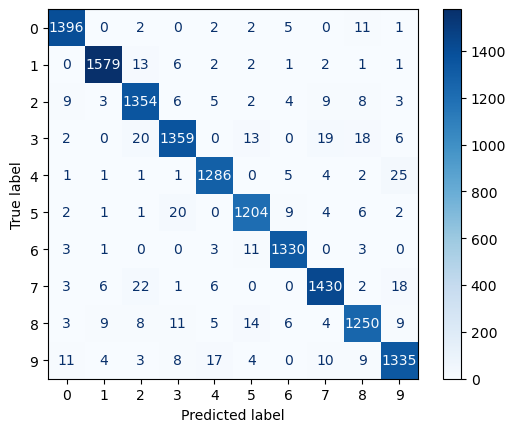

RandomForestClassifier(random_state=42)
[8 1 3 ... 5 3 8]


In [13]:
# Gör förutsägelser på testdatan
y_test_pred = best_model.predict(X_test_scaled)

# Beräkna accuracy på testdatan
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Visualisera confusion matrix på testdatan
cm_test = confusion_matrix(y_test, y_test_pred)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.arange(10))
cmd_test.plot(cmap=plt.cm.Blues)
plt.show()

print(best_model)
print(y_test_pred)

## Spara den bästa Modellen med Joblib

In [15]:
import joblib
# För att spara den bästa modellen, använder jag joblib.dump, den spara modellen på min dator
joblib.dump(best_model, 'best_model.pkl')
print("Bästa modellen har sparats!")

# Ladda den sparade modellen med joblib.load
best_model = joblib.load('best_model.pkl')

# KONTROLL AV LADDADE MODELLEN: Gör förutsägelser på testdatan med den laddade modellen genom att mata in nya exempel från testdatan 
#och se om modellen gör korrekta förutsägelser.
# Gör förutsägelser med den laddade modellen
y_test_pred_loaded = best_model.predict(X_test_scaled)

# Jämförelse av förutsägelser med verkliga värden
print("Första 15 förutsägelserna: ", y_test_pred_loaded[:15])
print("Första 15 verkliga värdena: ", y_test[:15])

# Beräkna accuracy på testdatan
test_accuracy_loaded = accuracy_score(y_test, y_test_pred_loaded)
print(f'Laddad modell - Test Accuracy: {test_accuracy_loaded:.4f}')

Bästa modellen har sparats!
Första 15 förutsägelserna:  [8 1 3 7 7 6 8 1 1 8 3 0 7 3 9]
Första 15 verkliga värdena:  [8 1 3 7 7 6 8 1 1 8 3 0 7 3 9]
Laddad modell - Test Accuracy: 0.9659


## Förklaring av ovanstående koden
Koden ovanför sparade en fil (best_model.pkl) på min dator. Sedan laddar jag upp den sparade modellen med hjälp av joblib.load. 

En kontroll av den laddade modellen gjordes och det visade att modellen är korrekt sparad och laddad med joblib.

Test accuracy på 0.9659 visar att modellen fungerar bra på testdatan. 

# Streamlit-applikation

In [18]:
#!pip install streamlit-drawable-canvas

In [19]:
streamlit_code = '''
import streamlit as st
from PIL import Image, ImageFilter
import numpy as np
import joblib
import matplotlib.pyplot as plt
from streamlit_drawable_canvas import st_canvas  # Använd rätt import för drawable canvas


# Ladda den tränade modellen
best_model = joblib.load('best_model.pkl')

# Funktion för att förbereda och bearbeta bilden
def prepare_image(image):
    # Omvandla bilden till gråskala
    image = image.convert('L')
    
    # Lägg till en liten oskärpa för att hjälpa modellen att fokusera på siffran
    image = image.filter(ImageFilter.GaussianBlur(1))  # Lägg till en mild oskärpa
    
    # Ändra storlek till 28x28 pixlar (som MNIST-formatet)
    image = image.resize((28, 28))
    
    # Omvandla till en array och normalisera pixelvärden
    image_array = np.array(image)
    image_array = np.array(image).reshape(1, 784)  # Omvandla till en vektor med 784 pixlar
    image_array = image_array / 255.0  # Skala mellan 0 och 1
    
    return image_array

# Streamlit app
st.title('Streamlit MNIST Prediktera en Siffra')
st.write('Välj ett alternativ nedan för att få en siffra predikterad.')

# Alternativ 1: Ladda upp en bild
option = st.selectbox("Välj ett alternativ:", ["Ladda upp bild", "Rita en siffra", "Ta en bild med kameran"])

if option == "Ladda upp bild":
    uploaded_image = st.file_uploader("Välj en bild att ladda upp", type=["png", "jpg", "jpeg"])

    if uploaded_image is not None:
        # Visa den uppladdade bilden
        image = Image.open(uploaded_image)
        st.image(image, caption='Uppladdad bild.', use_column_width=True)

        # Förbered bilden och visa den för att säkerställa att den ser bra ut
        image_array = prepare_image(image)
        st.image(image_array.reshape(28, 28), caption='Förberedd bild för förutsägelse', use_column_width=True)

        # Gör en förutsägelse
        prediction = best_model.predict(image_array)
        st.write(f"Förutsägelsen är: {prediction[0]}")

elif option == "Rita en siffra":
    # Skapa en ritpanel med hjälp av st_canvas (från streamlit)
    st.write("Rita en siffra i ritytan nedan:")
    canvas_result = st_canvas(
        fill_color="white", 
        width=280, 
        height=280, 
        drawing_mode="freedraw", 
        key="canvas"
    )

    if canvas_result.image_data is not None:
        # Förbered bilden som ritas
        image = Image.fromarray(canvas_result.image_data)
        image_array = prepare_image(image)

        # Prediktera siffra
        prediction = best_model.predict(image_array)
        st.write(f"Förutsägelsen är: {prediction[0]}")

elif option == "Ta en bild med kameran":
    # Ta bild via datorns kamera
    st.write("Ta en bild med din kamera för att prediktera en siffra:")

    camera_image = st.camera_input("Kamera")

    if camera_image is not None:
        # Visa den tagna bilden
        image = Image.open(camera_image)
        st.image(image, caption='Tagen bild.', use_column_width=True)

        # Förbered och gör en prediktion
        image_array = prepare_image(image)
        prediction = best_model.predict(image_array)
        st.write(f"Förutsägelsen är: {prediction[0]}")

'''

# Spara koden till app.py
with open('app.py', 'w') as f:
    f.write(streamlit_code)

print("Fil app.py skapad!")


Fil app.py skapad!


## Förklaring av resultat av den första Streamlit app

Streamlit app skapades väl dock modellen predikterar alltid för alla bilder, ritningar och foto samma siffra "8".

Felet kan bero på att modellen inte tränades bra och har inte generaliserat bra eftersom den förutsäger samma värde alltid. 

En annan möjliga orsak till varför streamlit app inte predikterar rätt siffra kan beror på bildförberedelsen, att 
bilderna inte är korrekta förberedda innan de matas in i modellen. Eller att att bildens form och skalar inte är
korrekta.

Så, jag har försökt förstå varför modellen inte predikterade rätt och testade olika åtgärder för att kunna lösa problemet. Nedanför beskriver jag de steg jag har försökt göra:

**Försök att lösa debbuggning** 

**1) Förbättra bildförberedelsen**
I det här steget försökte med att förbereda och bearbeta bilden genom att ändra på bilden storlek till 28x28 pixlar
Normaliserade bilder, omvandlade till en array och skalade till [0, 1], försökte även att lägga en centring... 
**men inget av detta löste problemet**. 

**2) Träna om modellen**, jag testade det och försökte även skapa andra modeller än SVM och RandomForest, sparade på nytt filen, **men det löste inte heller problemet**. 

**3) Uppdaterat skicit-learn och de andra bibliotek som används**  Jag gjorde det **men det har inte hjälpt heller**.

**4) Det verkar som modellen har fastnat på en lokal minimo eftersom den alltid förutsäger siffran "8".**

I det här steget testade jag att utvärdera modellen på ett testset med balanserade siffror för att säkerställa att den fungerar på data som den inte har sett tidigare. 

Här laddade jag ett testset som innehåller bilder av handskrivna siffror och endast bilder som inte innehåller 
siffran 8 ska anvädas. 

Modellen testades sedan för att se om den fortfarande predikterade 8 och modellens predikterade
fortfarande 8 trots att bilden har etiketter 7. 

Det tyder på att modellen kan vara överfitted och har det svårt att genereralisera till bilder som inte är 8. Modellen har troligtvis tränats på ett dataset där siffran 8 var överrepresenterad.

**5) Använda ett bredare testset och testa modellen på flera bilder från testsetet 
där siffran 8 inte överrepresenteras**

Det löste inte problemet, modellen predikterade fortfarande 8 för alla de andra siffror. Nästa steg här var att skapa en mer balanserat träningsdata där siffran 8 tagits bort från träningsuppsättning.

Alltså, dataset nu blir mer representativ där siffran 0-7 och 9 har ungefär lika många gånger förekommande.

**6)  Träna om modellen med den balanserad datasetet.**
Modellen tränats bra och visade att ha bra prestanda. Modellen gav en valideringsnoggranhet på 97,15% vilket visar att modellen fungerar bra på data som den inte har sett tidigare under träningen. Den fick också en testnoggranhet på 87,69% vilket är också bra.

Modellen på balanserat data har sparat som "best_model_balanced.pkl" ocn en ny streamlit app skapades "app_balanced.py"

Förklaring om hur den andra app_balanced.py predikteras anger jag nedanför efter appens script . 


In [39]:
#pip install scikit-learn==1.6.1

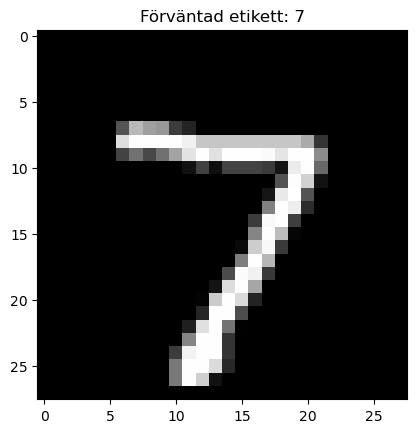

Modellens förutsägelse: 8


In [41]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from PIL import Image

# Ladda den tränade modellen
model_path = 'best_model.pkl'
best_model = joblib.load(model_path)

# Ladda MNIST-testdatasetet från OpenML
mnist = fetch_openml('mnist_784', version=1)

# Hämta testsetet (bilder och deras etiketter)
X_test = mnist.data[60000:]  # Testdata
y_test = mnist.target[60000:]  # Testetiketter

# Hitta en bild som inte är en "8"
non_eight_indices = np.where(y_test != '8')[0]
test_index = non_eight_indices[0]  # Ta den första bilden som inte är en 8

# Hämta bilden och etiketten
test_image = X_test.iloc[test_index].values.reshape(28, 28)
test_label = y_test.iloc[test_index]

# Visa testbilden
plt.imshow(test_image, cmap='gray')
plt.title(f"Förväntad etikett: {test_label}")
plt.show()

# Förbered bilden för förutsägelse (förbehandling)
test_image = test_image.astype(np.uint8)  # Se till att datatypen är korrekt
test_image = Image.fromarray(test_image)  # Konvertera till PIL-bild
test_image = test_image.convert('L').resize((28, 28))  # Omvandla till gråskala och ändra storlek
test_image_array = np.array(test_image).reshape(1, 784) / 255.0  # Skala till [0, 1]

# Gör en förutsägelse med modellen
prediction = best_model.predict(test_image_array)
print(f"Modellens förutsägelse: {prediction[0]}")


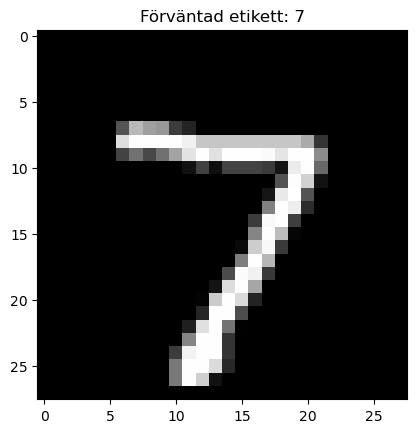

Modellens förutsägelse: 8


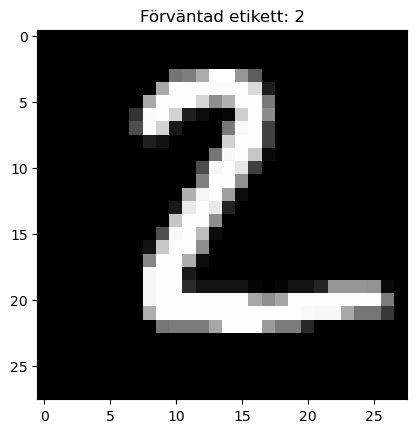

Modellens förutsägelse: 8


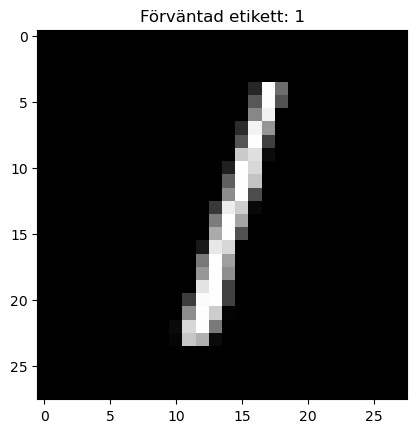

Modellens förutsägelse: 8


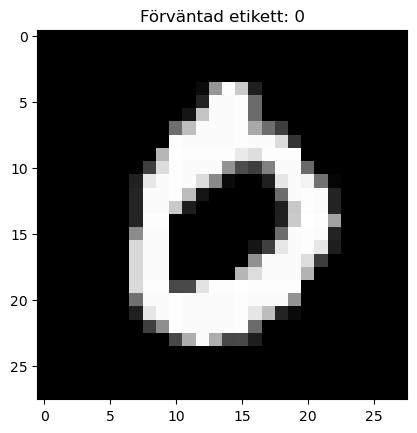

Modellens förutsägelse: 8


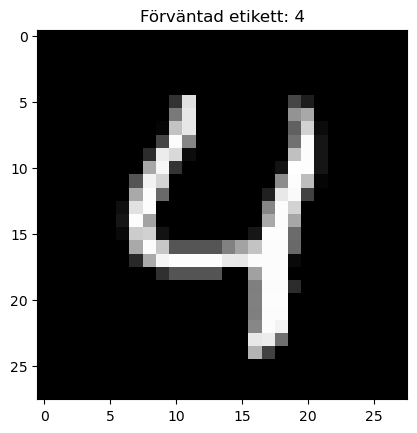

Modellens förutsägelse: 8


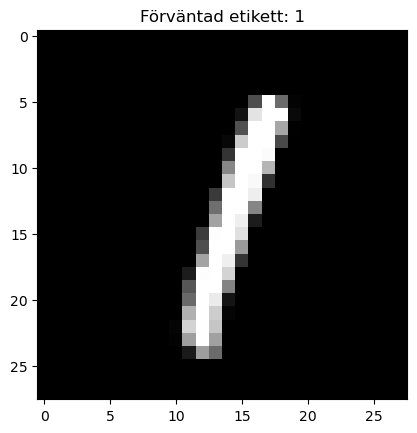

Modellens förutsägelse: 8


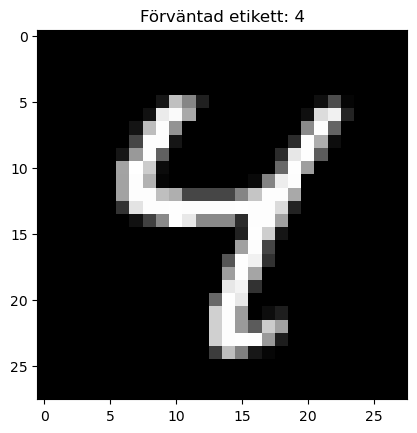

Modellens förutsägelse: 8


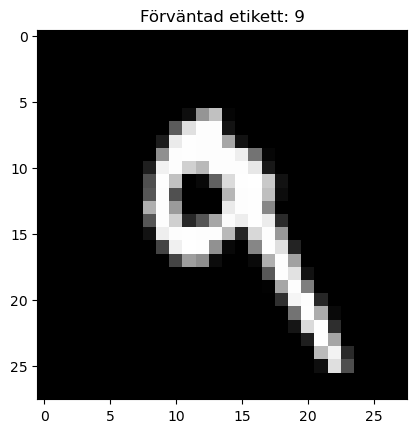

Modellens förutsägelse: 8


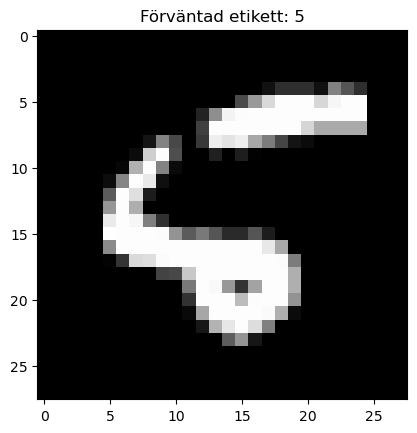

Modellens förutsägelse: 8


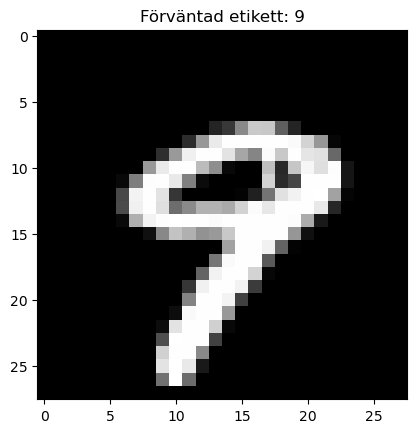

Modellens förutsägelse: 8


In [43]:
# Hämta några bilder som inte är "8"
non_eight_indices = np.where(y_test != '8')[0]
test_indices = non_eight_indices[:10]  # Testa på de första 10 bilderna som inte är 8

for test_index in test_indices:
    # Hämta bilden och etiketten
    test_image = X_test.iloc[test_index].values.reshape(28, 28)
    test_label = y_test.iloc[test_index]

    # Visa testbilden
    plt.imshow(test_image, cmap='gray')
    plt.title(f"Förväntad etikett: {test_label}")
    plt.show()

    # Förbered bilden för förutsägelse
    test_image = test_image.astype(np.uint8)  # Se till att datatypen är korrekt
    test_image = Image.fromarray(test_image)  # Konvertera till PIL-bild
    test_image = test_image.convert('L').resize((28, 28))  # Omvandla till gråskala och ändra storlek
    test_image_array = np.array(test_image).reshape(1, 784) / 255.0  # Skala till [0, 1]

    # Gör en förutsägelse med modellen
    prediction = best_model.predict(test_image_array)
    print(f"Modellens förutsägelse: {prediction[0]}")


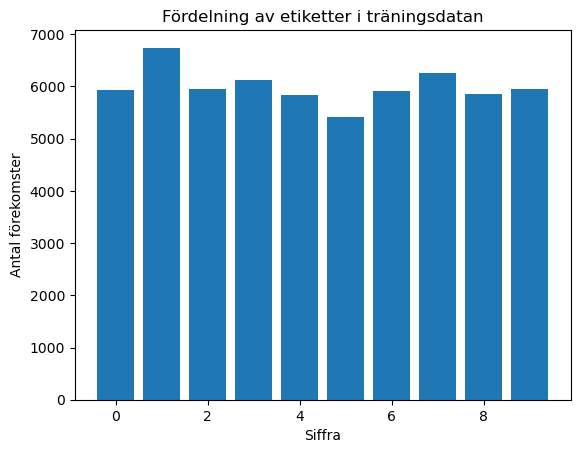

Fördelning av siffror i träningsdatan: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

# Ladda MNIST-datasetet
mnist = fetch_openml('mnist_784', version=1)

# Extrahera etiketter från datasetet
y_train = mnist.target[:60000]  # Träningsetiketter
y_test = mnist.target[60000:]   # Testetiketter

# Konvertera etiketter till hela tal för enklare hantering
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Räkna antalet förekomster av varje etikett i träningsdatan
train_label_counts = np.bincount(y_train)

# Visualisera fördelningen av etiketter i träningsdatan
plt.bar(range(10), train_label_counts)
plt.title("Fördelning av etiketter i träningsdatan")
plt.xlabel("Siffra")
plt.ylabel("Antal förekomster")
plt.show()

# Skriv ut fördelningen för att analysera om siffran 8 är överrepresenterad
print(f"Fördelning av siffror i träningsdatan: {train_label_counts}")


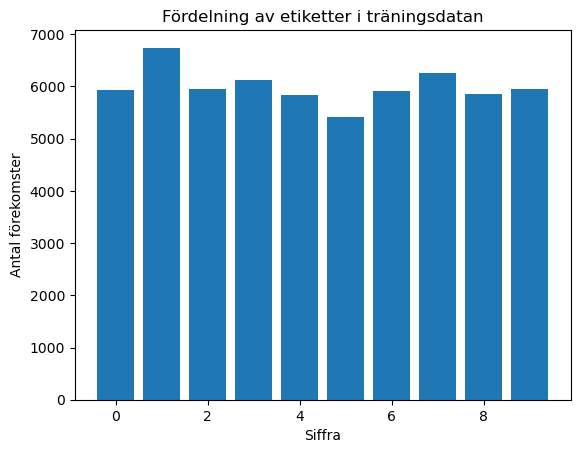

Fördelning av siffror i träningsdatan: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Fördelning av siffror efter undersampling: [5923 6742 5958 6131 5842 5421 5918 6265    0 5949]


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Ladda hela MNIST datasetet
mnist = fetch_openml('mnist_784', version=1)

# Skilj på tränings- och testdata
X_train = mnist.data[:60000]  # Träningsdata (60000 bilder)
y_train = mnist.target[:60000]  # Träningsetiketter
X_test = mnist.data[60000:]  # Testdata (10000 bilder)
y_test = mnist.target[60000:]  # Testetiketter

# Konvertera etiketter till hela tal för enklare hantering
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Räkna antalet förekomster av varje etikett i träningsdatan
train_label_counts = np.bincount(y_train)

# Visualisera fördelningen av etiketter i träningsdatan
plt.bar(range(10), train_label_counts)
plt.title("Fördelning av etiketter i träningsdatan")
plt.xlabel("Siffra")
plt.ylabel("Antal förekomster")
plt.show()

# Skriv ut fördelningen för att analysera om siffran 8 är överrepresenterad
print(f"Fördelning av siffror i träningsdatan: {train_label_counts}")

# Ta bort exempel där etiketten är 8 (undersampling)
X_train_balanced = X_train[y_train != 8]
y_train_balanced = y_train[y_train != 8]

# Kontrollera den nya fördelningen
balanced_label_counts = np.bincount(y_train_balanced)
print(f"Fördelning av siffror efter undersampling: {balanced_label_counts}")


In [49]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import warnings
# Skapa en SMOTE-instans och passa den på träningsdatan
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Kontrollera fördelningen efter översampling
resampled_label_counts = np.bincount(y_train_resampled)
print(f"Fördelning av siffror efter översampling: {resampled_label_counts}")


warnings.filterwarnings("ignore", category=FutureWarning)

/Users/marilenesvedberg/Desktop/anaconda-python/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Fördelning av siffror efter översampling: [6742 6742 6742 6742 6742 6742 6742 6742 6742 6742]


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Dela upp den balanserade träningsdatan i en ny tränings- och valideringsuppsättning
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

# Skapa en ny modell, t.ex. RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Träna modellen
model.fit(X_train_split, y_train_split)

# Gör en förutsägelse på valideringsdatan
y_val_pred = model.predict(X_val_split)

# Utvärdera modellen
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Modellens noggrannhet på valideringsuppsättningen: {accuracy:.4f}")

# Testa modellen på testuppsättningen
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Modellens noggrannhet på testuppsättningen: {test_accuracy:.4f}")


Modellens noggrannhet på valideringsuppsättningen: 0.9715
Modellens noggrannhet på testuppsättningen: 0.8769


In [53]:
from PIL import Image
import numpy as np

# Funktion för att förbereda en bild för förutsägelse
def prepare_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # Omvandla till gråskala
    image = image.resize((28, 28))  # Ändra storlek till 28x28 pixlar
    image_array = np.array(image)  # Omvandla till en array
    image_array = image_array.reshape(1, 784) / 255.0  # Skala till [0, 1]
    return image_array

# Funktion för att göra en förutsägelse på en ny bild
def predict_new_image(image_path):
    image_array = prepare_image(image_path)
    prediction = model.predict(image_array)  # Använd den tränade modellen
    return prediction[0]

# Testa med en ny bild (ladda upp bildens sökväg)
image_path = "Screenshot 2025-01-30 at 14.52.04.png"  # Ersätt med sökvägen till din bild
prediction = predict_new_image(image_path)

print(f"Förutsägelse för den nya bilden: {prediction}")

Förutsägelse för den nya bilden: 7


/Users/marilenesvedberg/Desktop/anaconda-python/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


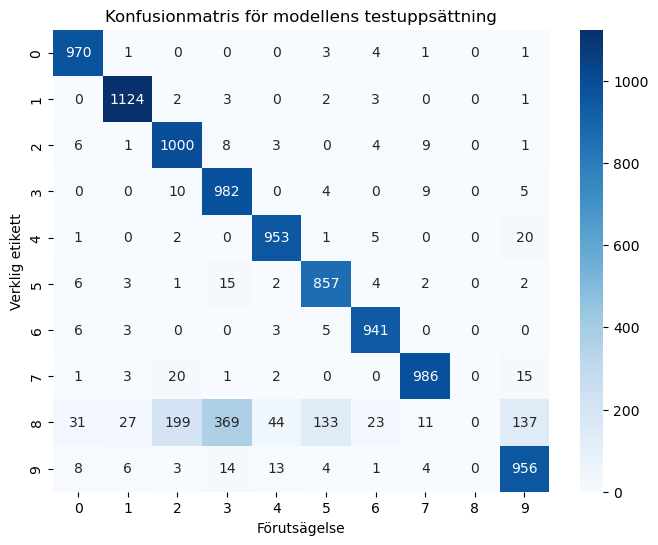

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gör förutsägelser på testdata
y_test_pred = model.predict(X_test)

# Skapa en konfusionmatris
cm = confusion_matrix(y_test, y_test_pred)

# Visualisera konfusionmatrisen
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Förutsägelse")
plt.ylabel("Verklig etikett")
plt.title("Konfusionmatris för modellens testuppsättning")
plt.show()

In [57]:
import joblib

# Spara den tränade modellen på balanserat data
model_path = 'best_model_balanced.pkl'
joblib.dump(model, model_path)

print(f"Modellen har sparats som {model_path}")


Modellen har sparats som best_model_balanced.pkl


In [18]:
streamlit_code = '''
import streamlit as st
from PIL import Image, ImageFilter
import numpy as np
import joblib
import matplotlib.pyplot as plt
from streamlit_drawable_canvas import st_canvas  # Använd rätt import för drawable canvas


# Ladda den tränade modellen
best_model_balanced = joblib.load('best_model_balanced.pkl')

# Funktion för att förbereda och bearbeta bilden
def prepare_image(image):
    # Omvandla bilden till gråskala
    image = image.convert('L')
    # Lägg till en liten oskärpa för att hjälpa modellen att fokusera på siffran
    image = image.filter(ImageFilter.GaussianBlur(1))  # Lägg till en mild oskärpa
    # Ändra storlek till 28x28 pixlar (som MNIST-formatet)
    image = image.resize((28, 28))
    # Omvandla till en array och normalisera pixelvärden
    image_array = np.array(image)
    image_array = np.array(image).reshape(1, 784)  # Omvandla till en vektor med 784 pixlar
    image_array = image_array / 255.0  # Skala mellan 0 och 1
    
    return image_array

# Streamlit app
st.title('Streamlit MNIST Prediktera en Siffra')
st.write('Välj ett alternativ nedan för att få en siffra predikterad.')

# Alternativ 1: Ladda upp en bild
option = st.selectbox("Välj ett alternativ:", ["Ladda upp bild", "Rita en siffra", "Ta en bild med kameran"])

if option == "Ladda upp bild":
    uploaded_image = st.file_uploader("Välj en bild att ladda upp", type=["png", "jpg", "jpeg"])

    if uploaded_image is not None:
        # Visa den uppladdade bilden
        image = Image.open(uploaded_image)
        st.image(image, caption='Uppladdad bild.', use_column_width=True)

        # Förbered bilden och visa den för att säkerställa att den ser bra ut
        image_array = prepare_image(image)
        st.image(image_array.reshape(28, 28), caption='Förberedd bild för förutsägelse', use_column_width=True)

        # Gör en förutsägelse
        prediction = best_model_balanced.predict(image_array)
        st.write(f"Förutsägelsen är: {prediction[0]}")
        


elif option == "Rita en siffra":
    # Skapa en ritpanel med hjälp av st_canvas (från streamlit)
    st.write("Rita en siffra i ritytan nedan:")
    canvas_result = st_canvas(
        fill_color="white", 
        width=280, 
        height=280, 
        drawing_mode="freedraw", 
        key="canvas"
    )

    if canvas_result.image_data is not None:
        # Förbered bilden som ritas
        
        image = Image.fromarray(canvas_result.image_data)
        st.image(image, caption="Ritad bild", use_column_width=True)
        
        # Prediktera siffra
        image_array = prepare_image(image)
        prediction = best_model_balanced.predict(image_array)
        st.write(f"Förutsägelsen är: {prediction[0]}")
        


elif option == "Ta en bild med kameran":
    # Ta bild via datorns kamera
    st.write("Ta en bild med din kamera för att prediktera en siffra:")

    camera_image = st.camera_input("Kamera")

    if camera_image is not None:
        # Visa den tagna bilden
        image = Image.open(camera_image)
        st.image(image, caption='Tagen bild.', use_column_width=True)

        # Förbered och gör en prediktion
        image_array = prepare_image(image)
        prediction = best_model_balanced.predict(image_array)
        st.write(f"Förutsägelsen är: {prediction[0]}")

'''

# Spara koden till app.py
with open('app_balanced.py', 'w') as f:
    f.write(streamlit_code)

print("Fil app_balanced.py skapad!")


Fil app_balanced.py skapad!


## Förklaring av Streamlit app på balanserat data

Den andra applikationen med balanserat data predikterar inte siffra 8 längre. 

På alternativ "Ladda upp en bild" har den predikterar olika siffror för olika bilder och predikteringarna har inte varit rätt, endast för bilder med nummer 1 har den lyckats prediktera rätt. 

På alternativ "Rita en siffra" har det predikterat inte rätt heller, och ofta fastnat det på en och samma siffra.

På alternativ "Ta en bild med kamera" har inte heller predikterat rätt.

**Sammanfattning**

Jag har skapat två olika Streamlit app, den första "app.py" med alla dataset Mnist, men den funkade inte och fastnade i 
siffran 8. 

Försökte med att balansera datasetet genom köra modellen på dataset där "8" inte ingick. Den sista lösningen löste problemet med att första app fastnade på siffran 8, men däremot är prestanda på applikationen inte bra. Endast några bilder på siffran 1 predikterades rätt, alla andra siffrorna blev fel. 

